### Math - Probability Project

In [1]:
#import tools needed
import pandas as pd
import numpy as np
import itertools 
import statistics
from scipy.stats import binom
import math
from scipy.stats import norm
from scipy.stats import stats
from scipy.stats import f
from scipy.stats import chisquare
from scipy.stats import chi2


# Import Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#Import dataset
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Start run sanity checking

In [3]:
#Read to check the dataset
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Check Fields
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check how much Quantile / numeric description from insurance data

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/var/folders/r2/cyh4cv0n3zngbs9tdhdjfgs40000gn/T/ipykernel_83081/1060419263.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(southwest["charges"], bins = 20, hist = True, kde = True)
/var/folders/r2/cyh4cv0n3zngbs9tdhdjfgs40000gn/T/ipykernel_83081/1060419263.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

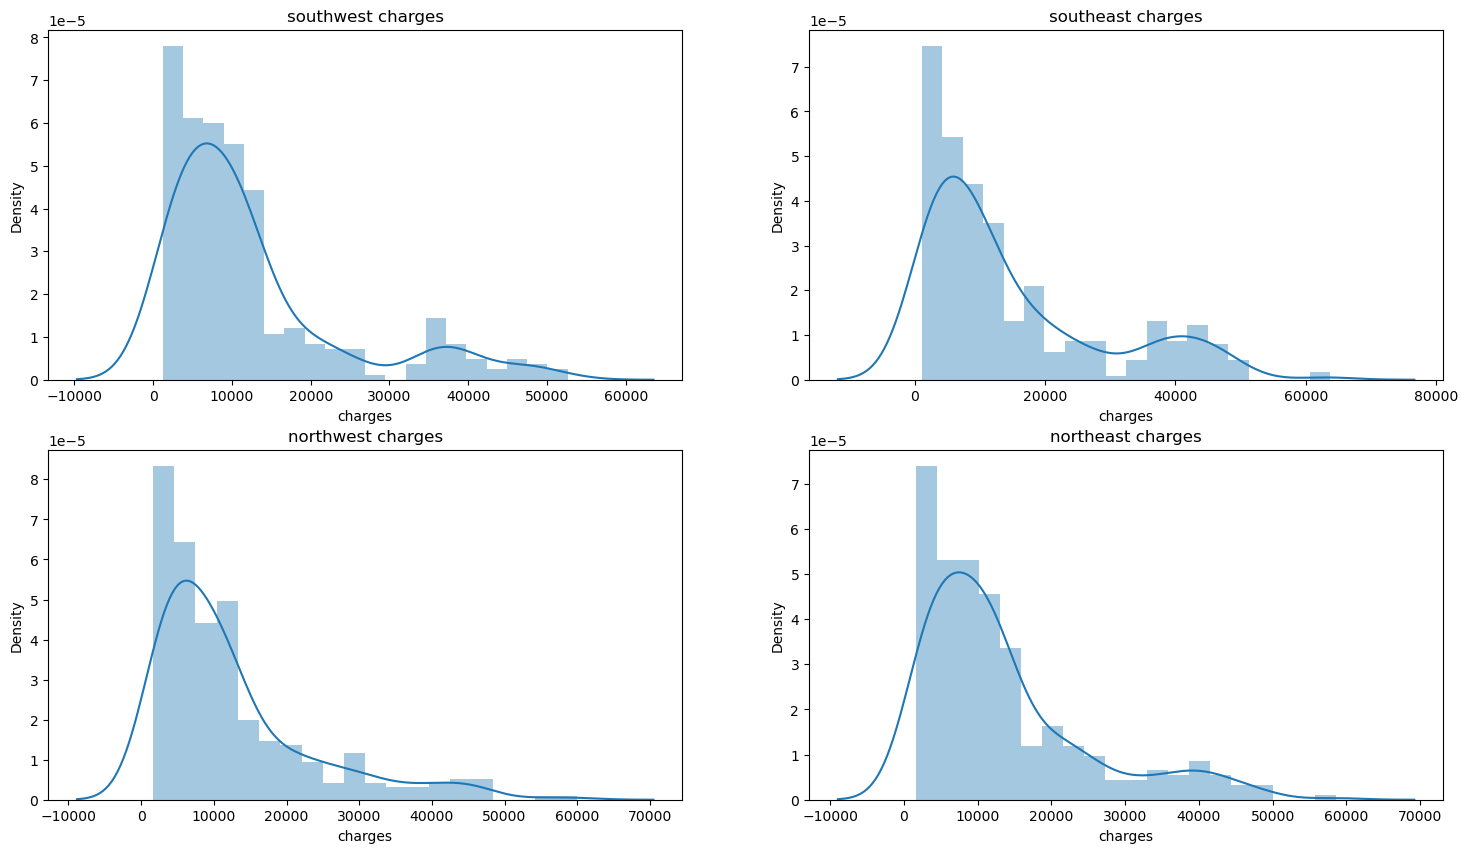

In [6]:
# Probability distribution on each region

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
southwest = insurance[insurance["region"] == "southwest"][["charges"]]
sns.distplot(southwest["charges"], bins = 20, hist = True, kde = True)
plt.title("southwest charges")

plt.subplot(2,2,2)
southeast = insurance[insurance["region"] == "southeast"][["charges"]]
sns.distplot(southeast["charges"], bins = 20, hist = True, kde = True)
plt.title("southeast charges")

plt.subplot(2,2,3)
northwest = insurance[insurance["region"] == "northwest"][["charges"]]
sns.distplot(northwest["charges"], bins = 20, hist = True, kde = True)
plt.title("northwest charges")

plt.subplot(2,2,4)
northeast = insurance[insurance["region"] == "northeast"][["charges"]]
sns.distplot(northeast["charges"], bins = 20, hist = True, kde = True)
plt.title("northeast charges")

plt.show()

In [7]:
# Create function, purposefully to easily check the distribution

def scatter_chart(title, xlabel, ylabel, x, y):
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.scatter(x = x, y = y, color = "y", data = insurance)
  plt.show()

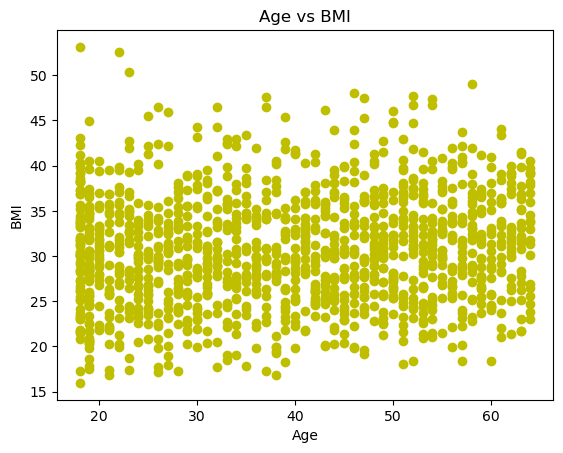

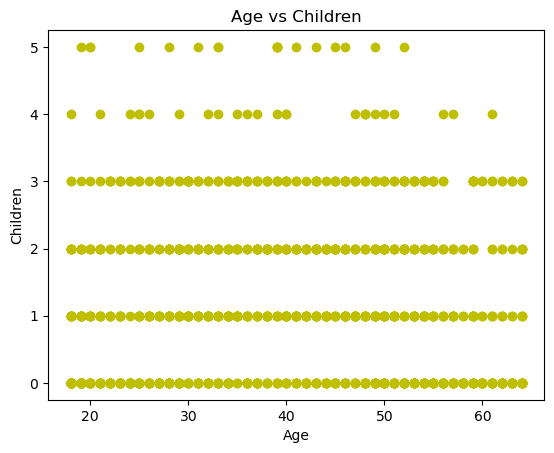

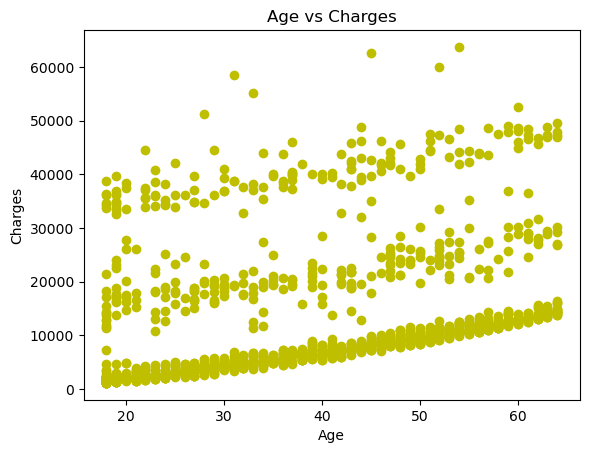

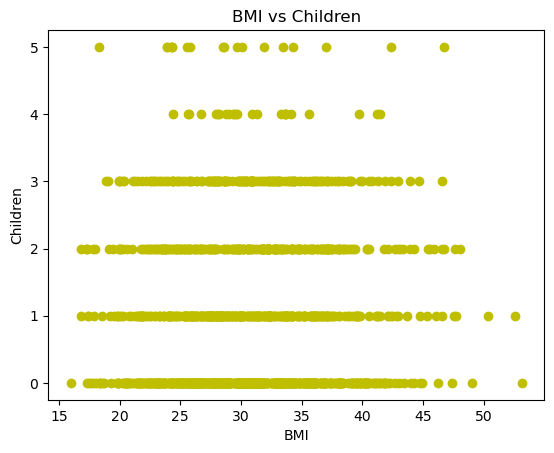

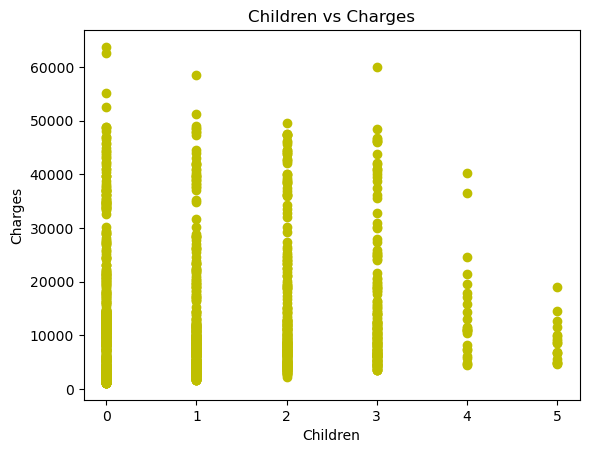

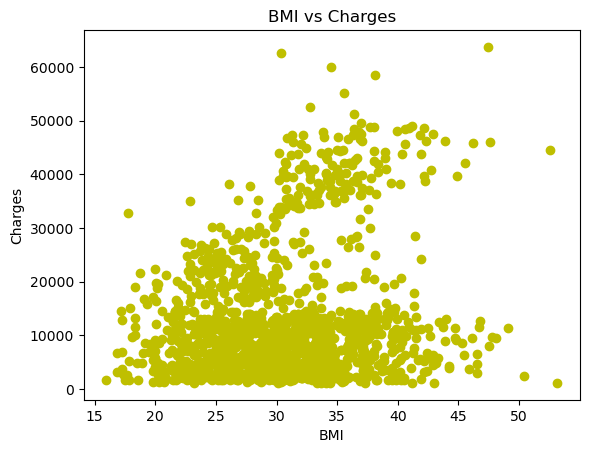

In [8]:
#Show the distribution using scatterplot

# Age vs BMI
scatter_chart("Age vs BMI", "Age", "BMI", "age", "bmi")

# Age vs Children 
scatter_chart("Age vs Children", "Age", "Children", "age", "children")

# Age vs Charges
scatter_chart("Age vs Charges", "Age", "Charges", "age", "charges")

# BMI vs Children 
scatter_chart("BMI vs Children", "BMI", "Children", "bmi", "children")

# Children vs Charges 
scatter_chart("Children vs Charges", "Children", "Charges", "children", "charges")

# BMI vs Charges 
scatter_chart("BMI vs Charges", "BMI", "Charges", "bmi", "charges")

## **1. Descriptive Statistic**

* To initiate the analysis process, let's see the most fundamental aspect, which is to find the data spread and average.

**a. How much the average age from the insurance data?**

In [9]:
avg_age = insurance["age"].mean()
print(f"Average age from the data set is {avg_age:.2f}")

Average age from the data set is 39.21


The result of average age in the data set is **39.21%**

**b. Apakah rata-rata umur perokok perempuan dan laki-laki sama secara proporsi?**

In [10]:
# Kita membutuhkan data jumlah perokok perempuan dan perokok laki-laki

#Transform Object data to numerical values
numeric_columns = insurance.select_dtypes(include=['number']).columns

#Find the mean
insurance.groupby(["sex", "smoker"])[numeric_columns].mean()

age        bmi  children       charges
sex    smoker                                              
female no      39.691042  30.539525  1.087751   8762.297300
       yes     38.608696  29.608261  1.008696  30678.996276
male   no      39.061896  30.770580  1.092843   8087.204731
       yes     38.446541  31.504182  1.188679  33042.005975

In [11]:
# filter data based on the Smoker value
smoker = insurance[insurance["smoker"] == "yes"]
smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [12]:
# setelah pilihan smoker semua "yes", kita dapatkan jumlah berikut.
smoker[["sex","age","smoker"]].groupby(["sex","smoker"]).mean()

,,age
sex,smoker,
female,yes,38.608696
male,yes,38.446541


Bahwa rata-rata umur perokok perempuan jauh lebih besar dari pada laki-laki dengan selisih 0.2

**c. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?**

In [13]:
# Data yang kita butuhkan adalah 1. Tagihan dari perokok, 2. Jumlah tagihan dari non-perokok
#setelah itu 

#cari variansi tagihan perokok dengan membuat tabel
tagihan_perokok = insurance[insurance["smoker"]=="yes"][["charges"]].reset_index()
tagihan_perokok


,index,charges
0,0,16884.92400
1,11,27808.72510
2,14,39611.75770
3,19,36837.46700
4,23,37701.87680
...,...,...
269,1313,36397.57600
270,1314,18765.87545
271,1321,28101.33305
272,1323,43896.37630


In [14]:
# Filter data
tagihan_non_perokok = insurance[insurance["smoker"]=="no"][["charges"]].reset_index()
tagihan_non_perokok


,index,charges
0,1,1725.55230
1,2,4449.46200
2,3,21984.47061
3,4,3866.85520
4,5,3756.62160
...,...,...
1059,1332,11411.68500
1060,1333,10600.54830
1061,1334,2205.98080
1062,1335,1629.83350


In [15]:
# kita simpan ke dalam variable baru dengan numpy
var_tagihan_perokok = np.var(tagihan_perokok)
var_tagihan_perokok

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


index      1.642753e+05
charges    1.327212e+08
dtype: float64

In [16]:
# kita simpan ke dalam variable baru dengan numpy
var_tagihan_non_perokok = np.var(tagihan_non_perokok)
var_tagihan_non_perokok

index      1.452963e+05
charges    3.589166e+07
dtype: float64

In [17]:
var_tagihan_perokok

index      1.642753e+05
charges    1.327212e+08
dtype: float64

In [18]:
var_tagihan_non_perokok

index      1.452963e+05
charges    3.589166e+07
dtype: float64

Text(0.5, 0, 'jumlah charges')

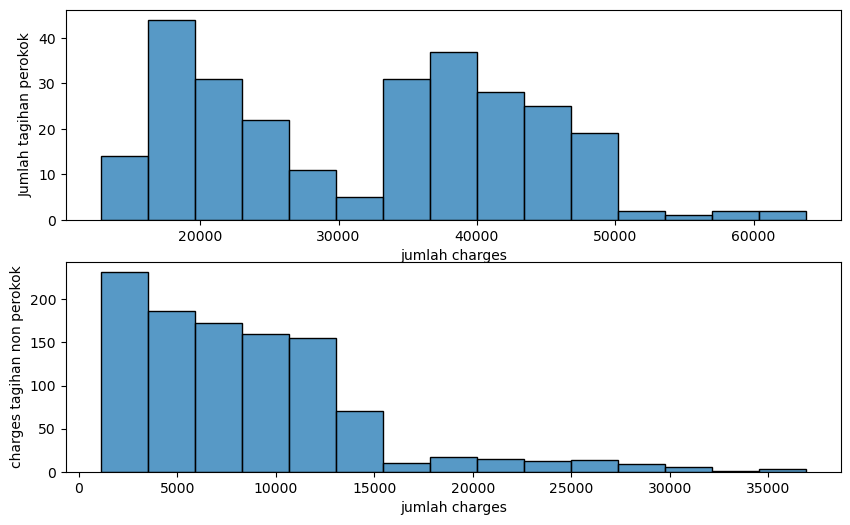

In [19]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
sns.histplot(tagihan_perokok["charges"], bins = 15 )
plt.ylabel('Jumlah tagihan perokok')
plt.xlabel('jumlah charges')


plt.subplot(2,1,2)
sns.histplot(tagihan_non_perokok["charges"], bins = 15)
plt.ylabel('charges tagihan non perokok')
plt.xlabel('jumlah charges')


**Artinya, tagihan perokok memiliki persebaran data lebih kecil namun harga nya lebih besar: Bagi orang yang merokok, harganya lebih mahal karena dari berdasarkan riwayat penyakit, perlu biaya yang besar.**

**d. Berapa rata-rata tagihan yang merokok dengan yang tidak merokok?**

In [20]:
# Show the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# Data yang dibutuhkan tagihan perokok, dan tagihan non perokok.
insurance.groupby(["smoker"])[["charges"]].mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


**Kesimpulan:** Tagihan perokok rata2 di 32050, lebih besar dibanding non perokok yaitu 8434.

**e. Rata-rata indeks berat badan dari yang merokok dan tidak, mana yang lebih besar?**

In [22]:
insurance.groupby(["smoker"])[["bmi"]].mean()

,bmi
smoker,
no,30.651795
yes,30.708449


**Kesimpulan:** Rata-rata indeks berat badan perokok dengan non-perokok berada di antara 30.65

## **2. Analisa Variabel Diskrit**

* Identifikasi peluang kondisi tertentu yang berpotensi memiliki besaran tertentu 

**a. Gender yang memiliki tagihan paling tinggi?**

In [23]:
insurance.groupby(["sex"])[["charges"]].max()

,charges
sex,
female,63770.42801
male,62592.87309


**Kesimpulan:** Tagihan paling tinggi berada pada gender female yaitu sebesar 63770 daripada gender male

In [24]:
total = 63770.42801 + 62592.87309
total

female = 63770.42801

proporsi_perempuan = female/total
print(f'segini adalah proporsi perempuan: {proporsi_perempuan}')

segini adalah proporsi perempuan: 0.5046594023333884


**b. Apakah setiap region memiliki proporsi data banyak orang yang sama?**

In [25]:
# Mengetahui region apa saja yang ada dalam data

# Total ada 4 region 

insurance["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
# masing-masing memiliki jumlah proporsi berikut:

insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [27]:
# assign into variables
proporsi_region = insurance["region"].value_counts()

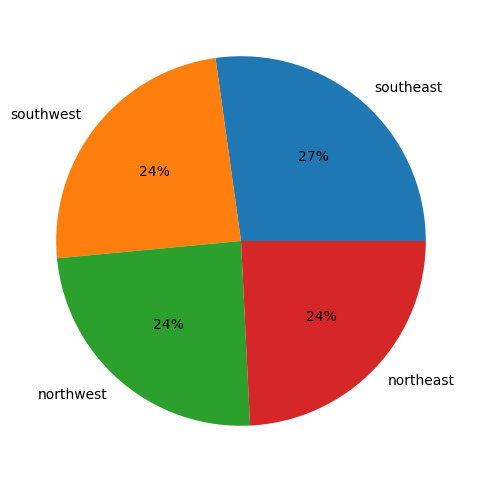

In [28]:
plt.figure(figsize=(10,6))

label = [
    "southeast",
    "southwest",
    "northwest",
    "northeast" 
    ]

plt.pie(proporsi_region,labels = label, autopct = '%.0f%%')
plt.show()

**Kesimpulan**: Secara percentage, proporsi southeast data orang lebih besar 3% dari 3 wilayah lainnya.

**c. Mana yang lebih tinggi proporsi perokok atau non perokok?**

In [29]:
#mencari nilai value
proporsi_perokok_dan_non = insurance["smoker"].value_counts()
proporsi_perokok_dan_non

smoker
no     1064
yes     274
Name: count, dtype: int64

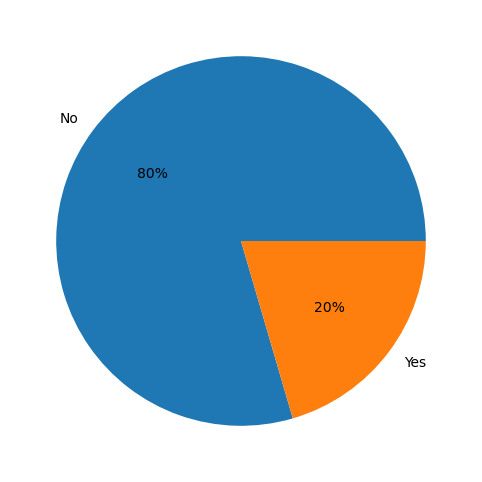

In [30]:
plt.figure(figsize=(10,6))

label = [
    "No",
    "Yes" 
    ]

plt.pie(proporsi_perokok_dan_non,labels = label, autopct = '%.0f%%')
plt.show()

**Kesimpulan:** Proporsi non perokok jauh lebih banyak sebesar 80% dibandingkan proporsi perokok.

**d. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?**

In [31]:
# melihat data-nya
perokok = pd.crosstab(index = insurance["sex"],columns = insurance["smoker"],margins=True)
perokok

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [32]:
#rumus --> lakiLaki | Perokok = laki_merokok / total_perokok

laki_merokok = 159
total_perokok = 274

peluang_laki_merokok = laki_merokok / total_perokok
peluang_laki_merokok

0.5802919708029197

**Kesimpulan:** peluang laki-laki merokok berdasarkan data adalah **0.58%**

**e. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?**

In [33]:
perempuan_merokok = 115
total_perokok = 274

peluang_perempuan_merokok = perempuan_merokok / total_perokok
peluang_perempuan_merokok

0.4197080291970803

**Kesimpulan:** peluang perempuan merokok berdasarkan data adalah **0.42%**

## **3. Analisa Variabel Kontinu**

* Variabel dalam data yang kita punya bisa jadi tidak semuanya berbentuk diskrit, untuk memahami kemungkinan kondisi variabel bernilai kontinu pada data, kita bisa melakukan analisa pada data tersebut.

**1. Mana yang lebih mungkin terjadi:**
* a. Seorang dengan bmi diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
* b. Seseorang dengan bmi dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k


In [34]:
# yang nomer a

bmi_atas = insurance[insurance["bmi"] > 25][["charges"]].reset_index(drop=True)
bmi_atas

,charges
0,16884.9240
1,1725.5523
2,4449.4620
3,3866.8552
4,3756.6216
...,...
1086,10600.5483
1087,2205.9808
1088,1629.8335
1089,2007.9450


In [35]:
bmi_atas_filter = bmi_atas[bmi_atas["charges"] > 16700].reset_index(drop=True)
bmi_atas_filter

,charges
0,16884.92400
1,28923.13692
2,27808.72510
3,39611.75770
4,36837.46700
...,...
278,36397.57600
279,19496.71917
280,28101.33305
281,43896.37630


In [36]:
# Mencari proporsi data atas filter dengan data bmi atas 
proporsi_a = len(bmi_atas_filter)/len(bmi_atas)
proporsi_a

0.25939505041246563

**Sekarang mencari soal b**

In [37]:
# filter berdasarkan bmi
bmi_bawah = insurance[insurance["bmi"] < 25][["charges"]].reset_index(drop=True)
bmi_bawah

,charges
0,21984.47061
1,1837.23700
2,2395.17155
3,14451.83515
4,2775.19215
...,...
240,21259.37795
241,16115.30450
242,18765.87545
243,1731.67700


In [38]:
# filter bmi berdasarkan 16.700
bmi_bawah_filter = bmi_bawah[bmi_bawah["charges"]>16700].reset_index(drop=True)
bmi_bawah_filter.head(10)

,charges
0,21984.47061
1,23244.79020
2,30166.61817
3,17663.14420
4,21098.55405
5,22412.64850
6,32734.18630
7,27375.90478
8,19964.74630
9,21223.67580


In [39]:
# sekarang kalkulasi
proporsi_b = len(bmi_bawah_filter)/len(bmi_bawah)
proporsi_b

0.20816326530612245

In [40]:
print(f"Sehingga jawaban nya adalah proporsi: {proporsi_a:.2f} karena dia lebih memungkinkan dibandingkan proporsi b {proporsi_b:.2f}") 

Sehingga jawaban nya adalah proporsi: 0.26 karena dia lebih memungkinkan dibandingkan proporsi b 0.21


**2. Mana yang lebih mungkin terjadi:**
* a. Seorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau 
* b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k


In [41]:
# Seorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
# filter berdasarkan bmi perokok

bmi_perokok = insurance[(insurance["bmi"] > 25) & (insurance["smoker"]=="yes")][["charges"]].reset_index(drop=True)
bmi_perokok

,charges
0,16884.92400
1,27808.72510
2,39611.75770
3,36837.46700
4,37701.87680
...,...
214,33900.65300
215,36397.57600
216,28101.33305
217,43896.37630


In [42]:
#filter lagi berdasarkan perokok dengan biaya nya
bmi_perokok_filter = bmi_perokok[bmi_perokok["charges"] > 16700].reset_index(drop=True)
bmi_perokok_filter

,charges
0,16884.92400
1,27808.72510
2,39611.75770
3,36837.46700
4,37701.87680
...,...
210,33900.65300
211,36397.57600
212,28101.33305
213,43896.37630


In [43]:
# kalkulasi proporsi nya 
proporsi_perokok = len(bmi_perokok_filter)/len(bmi_perokok)
proporsi_perokok

0.9817351598173516

**Sekarang mencari soal yang b**

In [44]:
# Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
bmi_non = insurance[(insurance["bmi"]>25) & (insurance["smoker"]=="no")][["charges"]].reset_index(drop=True)
bmi_non

,charges
0,1725.5523
1,4449.4620
2,3866.8552
3,3756.6216
4,8240.5896
...,...
867,11411.6850
868,10600.5483
869,2205.9808
870,1629.8335


In [45]:
# Sekarang filter berdasarkan biaya nya 
bmi_non_filter = bmi_non[bmi_non["charges"]>16700].reset_index(drop=True)
bmi_non_filter

,charges
0,28923.13692
1,20630.28351
2,21344.84670
3,30259.99556
4,27322.73386
...,...
63,18838.70366
64,36910.60803
65,23563.01618
66,30063.58055


In [46]:
# lalu melakukan kalkulasi
proporsi_non_perokok = len(bmi_non_filter)/len(bmi_non)
proporsi_non_perokok

0.0779816513761468

In [47]:
print(f"Artinya yang mungkin terjadi adalah proporsi perokok {proporsi_perokok:.2f}")
print(f"Dibandingkan proporsi non perokok {proporsi_non_perokok:.2f}")

Artinya yang mungkin terjadi adalah proporsi perokok 0.98
Dibandingkan proporsi non perokok 0.08


## **4. Analisa Korelasi Variabel**

* Korelasi tagihan kesehatan minimal dengan 2 variabel lainnya, misalnya dengan bmi dan variable tanggungan anak.

In [48]:
# langsung saja kita panggil menggunakan metode fungsi corr() dengan memanggil data yang hanya numerik
insurance[['age', 'bmi', 'children', 'charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


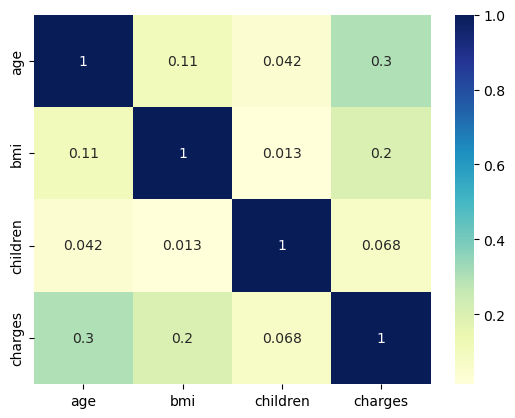

In [49]:
#Buat visualisasi nya 

dataplot = sns.heatmap(insurance[['age', 'bmi', 'children', 'charges']].corr()
, cmap = "YlGnBu", annot=True)

#Menampakkan heat map
plt.show()

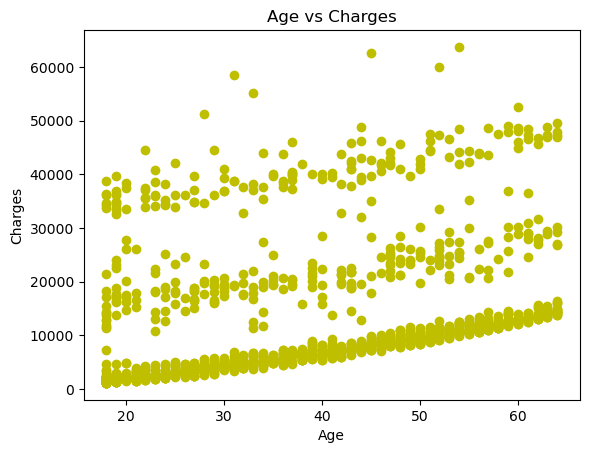

In [50]:
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.scatter(x ="age", y = "charges", color = 'y', data = insurance)
plt.show()

**Kesimpulan** Korelasi antara: **tagihan** dengan **umur** adalah yang paling mendekati 1, semakin tinggi umurnya, semakin naik juga tagihan nya.

## **5. Pengujian Hipotesis**
- 1. Tagihan kesehatan laki-laki lebih tinggi dari perempuan.
- 2. Proporsi perokok laki-laki lebih besar dari perempuan.
- 3. Variansi tagihan kesehatan perokok dan non perokok sama.

In [51]:
# rata-rata .mean()
# varians np.var()
# standar deviasi statistics.stdev()

1. **Menjawab Tagihan kesehatan laki-laki lebih tinggi dari perempuan.**

Diketahui tagihan paling tinggi berada pada gender female yaitu sebesar 63770 daripada gender male. Lalu disini dinyatakan bahwa apakah tagihan kesehatan laki-laki lebih tinggi dari perempuan. 

- h0 = tagihan laki laki ≤ tagihan perempuan 
- h1 = tagihan laki-laki > dari tagihan perempuan 

Mari kita uji hipotesis!

In [52]:
total = 63770.42801 + 62592.87309
total

female = 63770.42801

proporsi_perempuan = female/total
print(f'ini adalah proporsi perempuan: {proporsi_perempuan}')

ini adalah proporsi perempuan: 0.5046594023333884


In [53]:
#Diketahui tagihan paling tinggi berada pada gender female yaitu sebesar 63770 daripada gender male. Lalu disini dinyatakan bahwa apakah tagihan kesehatan laki-laki lebih tinggi dari perempuan.

#h0 = tagihan laki laki ≤ tagihan perempuan
#h1 = tagihan laki-laki > dari tagihan perempuan

n = 676 + 662

# jumlah sampel
n_a = 676
n_b = 662

# jumlah kejadian positif pada setiap kelompok
p_a = 676/n
p_b = 662/n

# hitung proporsi dan selisih proporsi
proporsi_a = p_a / n_a
proporsi_b = p_b / n_b
selisih_proporsi = proporsi_a - proporsi_b

# hitung standar error
SE = math.sqrt(proporsi_a*(1-proporsi_a)/n_a + proporsi_b*(1-proporsi_b)/n_b)

# hitung z-score
z = selisih_proporsi / SE

# tentukan alpha dan hitung p-value
alpha = 0.05
p_value = 2 * (1 - norm.cdf(abs(z)))

# tentukan keputusan berdasarkan p-value
if p_value < alpha:
    print("Tolak hipotesis nol")
else:
    print("Terima hipotesis nol")

Terima hipotesis nol


In [54]:
# Diketahui tagihan paling tinggi berada pada gender female yaitu sebesar 63770 daripada gender male. 
# Lalu disini dinyatakan bahwa proporsi tagihan kesehatan laki-laki lebih tinggi dari perempuan.

# h0 = tagihan laki-laki > dari tagihan perempuan
# h1 = tagihan laki laki ≤ tagihan perempuan 

# sample sizes
n_male = 676
n_female = 662
n = n_male + n_female

# sample proportions
p_male = n_male / n
p_female = n_female / n

# difference in sample proportions
diff_prop = p_male - p_female

# standard error
SE = math.sqrt((p_male*(1-p_male)/n_male) + (p_female*(1-p_female)/n_female))

# z-score
z = diff_prop / SE

# p-value
p_value = 1 - norm.cdf(z) #--> kalau p- value di sebelah kanan, tapi kalau di sebelah kiri gak perlu di 1 -

# significance level
alpha = 0.05

# decision
if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Gagal untuk menolak null hypothesis")


Gagal untuk menolak null hypothesis


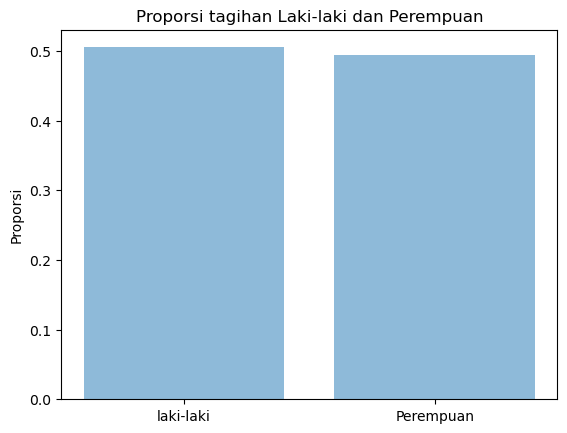

In [55]:
#kita buat visualisasi nya

# plot bar chart
labels = ['laki-laki', 'Perempuan']
proportions = [p_male, p_female]
x_pos = np.arange(len(labels))
plt.bar(x_pos, proportions, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Proporsi')
plt.title('Proporsi tagihan Laki-laki dan Perempuan')

plt.show()

**Kesimpulan nya adalah:** bahwa tagihan laki-laki lebih tinggi dibanding tagihan perempuan walau selisih sedikit sehingga h0 di tolak namun tidak terlalu signicant. Butuh data yang lebih banyak lagi untuk di test. 

2. **Menjawab Hipotesis b. Proposi perokok laki-laki lebih besar dari perempuan**

Untuk itu kita menggunakan konsep one single: proportion test.

* h0 (hipotesis-null) = Proporsi perokok laki-laki **tidak lebih besar** dari perokok perempuan.
* h1 = Proporsi perokok laki-laki masih lebih besar dari perokok perempuan

In [56]:
#jumlah sum dari orang yang merokok
n = 274 

#dua bagian perokok
laki_perokok = 159
perempuan_perokok = 115

#Proporsi sample
p_laki_rokok = laki_perokok/n 
p_perempuan_rokok = perempuan_perokok/n

#hitung selisih proporsi antara laki-laki dan perempuan 
selisih = p_laki_rokok - p_perempuan_rokok

#Hitung standar error (SE) dari selisih proporsi.
SE = math.sqrt((p_laki_rokok*(1-p_laki_rokok))/laki_perokok + (p_perempuan_rokok*(1-p_perempuan_rokok))/perempuan_perokok)

#Hitung nilai z-score dari selisih proporsi. 0 adalah nilai yang diharapkan (h0)
z = (selisih - 0) / SE

#memberikan asumsi peluang tolak h0 dalam zona critical
p_0 = 0.58 # --> asumsi diberikan h0

#hitung alpha-nya
alpha = 0.05 # --> nilai signifikansi yang kita percaya secara default

# menghitung z-score
z = (p_laki_rokok - p_0) / math.sqrt((p_0 * (1 - p_0)) / n)

#Hitung p-value. 
#Ini adalah probabilitas untuk mendapatkan selisih proporsi 
#Setidaknya sebesar nilai yang diobservasi (selisih) jika hipotesis nol benar.

p_value = 2 * (1 - norm.cdf(abs(z)))
#di mana norm.cdf() adalah fungsi kumulatif distribusi normal standar.

#Tentukan keputusan berdasarkan p-value. Jika p-value lebih kecil dari alpha, 
#Maka hipotesis nol ditolak dan hipotesis alternatif diterima. 
#Jika tidak, maka tidak cukup bukti untuk menolak hipotesis nol.

# melakukan pengujian hipotesis
if p_value < alpha:
    print("Jawaban: Hipotesis nol ditolak")
else:
    print("Jawaban: Hipotesis nol tidak dapat ditolak")

Jawaban: Hipotesis nol tidak dapat ditolak


**Setelah itu kita buat visualisasinya**

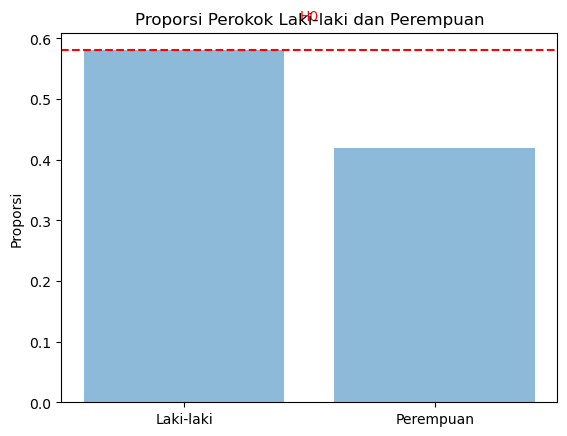

In [57]:
import matplotlib.pyplot as plt
import numpy as np


# plot bar chart
labels = ['Laki-laki', 'Perempuan']
proportions = [p_laki_rokok, p_perempuan_rokok]
x_pos = np.arange(len(labels))
plt.bar(x_pos, proportions, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Proporsi')
plt.title('Proporsi Perokok Laki-laki dan Perempuan')

# add reference line for null hypothesis proportion
p_0 = 0.58
plt.axhline(y=p_0, color='r', linestyle='--')
plt.text(0.5, p_0 + 0.05, 'H0', color='r', ha='center')

plt.show()

Maka jawaban nya adalah: **h0 tidak dapat ditolak karena data tidak cukup bukti untuk membuat h0 menjadi rejected.**

3. **Menjawab Variansi Tagihan kesehatan perokok dan non-perokok sama.**


In [58]:
#mencari tagihan perokok dan membentuk array

tagihan_perokok = insurance[insurance["smoker"] == "yes"][["charges"]]
arr_tag_perokok = tagihan_perokok.values

In [59]:
#mencari tagihan non-perokok
tagihan_non_perokok = insurance[insurance["smoker"] == "no"][["charges"]]
arr_tag_non_perokok = tagihan_non_perokok.values

In [60]:
sample_a = arr_tag_perokok
sample_b = arr_tag_non_perokok

#menentukan signifikansi
alpha = 0.05

#jumlah sample
n_a = len(sample_a)
n_b = len(sample_b)

#nilai tengah sample
mean_a = np.mean(sample_a)
mean_b = np.mean(sample_b)

#hitung variance dari nilai sample
var_a = np.var(sample_a, ddof=1)
var_b = np.var(sample_b, ddof=1)

#Secara default, NumPy mengasumsikan ddof=0, 
#yang berarti bahwa perhitungan standar deviasi didasarkan pada jumlah sampel populasi yang lengkap, 
#sehingga pembaginya adalah N (jumlah total sampel). source: ChatGPT

#menghitung uji statistik variance
f = var_a / var_b

#Hitung nilai kritis menggunakan distribusi F dengan derajat kebebasan 
#n-1 untuk kedua sampel, 
#dimana n adalah jumlah data masing-masing sampel:
    
df_a = n_a - 1
df_b = n_b - 1

#rumus critical value
critical_value = chi2.ppf(0.05, n-1)


#tentukan kesimpulan
if f > critical_value:
    print("Hipotesis nol ditolak, varian sample_a lebih besar daripada varian sample_b")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol")

Tidak cukup bukti untuk menolak hipotesis nol


In [61]:
# Data sample
perokok = arr_tag_perokok
non_perokok = arr_tag_non_perokok

# Mean and Variance of each group
mean_perokok = np.mean(perokok)
mean_non_perokok = np.mean(non_perokok)

var_perokok = np.var(perokok, ddof=1)
var_non_perokok = np.var(non_perokok, ddof=1)

# Sample sizes
n_perokok = len(perokok)
n_non_perokok = len(non_perokok)

# Chi-squared statistic calculation (variance ratio)
sigma = 1  # Assuming sigma is known
n = len(perokok) + len(non_perokok)
chi_squared = ((n - 2) * (var_perokok + var_non_perokok)) / (2 * sigma**2)

# Degrees of freedom (1 for the test of variances comparison between two groups)
df = 1  # degrees of freedom for comparison of two variances

# Calculate p-value using the chi-squared distribution (right tail)
p_value = 1 - chi2.cdf(chi_squared, df)

# Check if p_value is NaN and replace with 0
if pd.isna(p_value):
    p_value = 0

# Print p-value
print(f"P-value: {p_value}")

# Hypothesis Testing
alpha = 0.05
if p_value < alpha:
    print("Hipotesis nol ditolak (reject null hypothesis)")
else:
    print("Hipotesis nol diterima (fail to reject null hypothesis)")

P-value: 0.0
Hipotesis nol ditolak (reject null hypothesis)


### Kesimpulan: Dari hasil uji test, terdapat variansi pada data perokok dan data non-perokok